<center><img src="Fig/UGA.png" width="30%" height="30%"></center>
<center><h3>Master of Science in Industrial and Applied Mathematics (MSIAM)  - 1st year</h3></center>
<hr>
<center><h1>Numerical Optimization</h1></center>
<center><h2>Lab 9: Optimizing Neural Networks </h2></center>


---


In [1]:
%load_ext autoreload
%autoreload 2

---

In this lab, we will investigate numerical optimization techniques through practical experimentation on a classification problem. Utilizing PyTorch, you will manipulate parameters such as the number of neurons, optimizer selection, learning rate, batch size, and network architecture. Begin by adjusting default settings and gradually explore enhancements such as increasing the network's depth or modifying its structure. Moreover, you will handle large datasets efficiently using dataloaders to facilitate model training. Subsequently, dive into visualizing the MNIST dataset and implementing a sophisticated neural network for evaluation.

In this lab, we will investigate numerical optimization techniques through practical experimentation on a very simple classification problem. Utilizing PyTorch, you will manipulate parameters such as the number of neurons, optimizer selection, learning rate, and network architecture. In the second part we'll train a more intricate model to learn the MNIST dataset.

# First part: 2-D points classification

By default we consider 100 points, each belong to the class blue($-1$) or red($1$). The goal is to write a model that will output the class(blue/red) when given a 2D point as input.

## First data set: non linearly separable crescents

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import time
from notimportant import *
dtype=torch.float32
%matplotlib inline
from IPython import display

100 points in 2-D, closeness = 0.7
data's shape: torch.Size([2, 100])
label's shape:torch.Size([1, 100])
Both are <class 'torch.Tensor'>


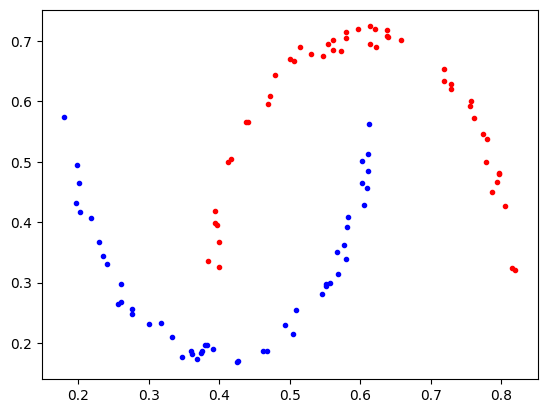

In [3]:
n = 100
closeness = 0.7

X, Y = crescents_dataset(n, closeness=closeness)
d, n = X.shape
print(f"{n} points in 2-D, closeness = {closeness}")
print(f"data's shape: {X.shape}\nlabel's shape:{Y.shape}")
print(f"Both are {type(X)}")
plt.plot( X[0,Y.flatten()>0], X[1,Y.flatten()>0], 'b.' )
plt.plot( X[0,Y.flatten()<0], X[1,Y.flatten()<0], 'r.' );

## One hidden layer neural network with ReLU activations

### Model and hyperparameters definition

In [4]:
import torch.nn as nn

# number of neurons
m = 5

model = nn.Sequential(
      nn.Linear(d, m),
      nn.ReLU(),
      nn.Linear(m, 1),
)
losslist = [] # store each iteration's loss
loss_fn = nn.SoftMarginLoss() # https://pytorch.org/docs/stable/nn.html#loss-functions
# try MSELoss ?


# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    
model # show what the resulting model is

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)

## Training loop

Everything is done automatically now, just need to call the right functions.
Important lines are commented.

In [5]:
def trainloop(seconds=2, secbetweenimage=1, show=True):
    start, lastimage = time.time(), 0
    i = 0
    losslist = []
    while time.time()-start <= seconds:
        i += 1

        # Forward pass: compute predicted y by passing x to the model.
        y_pred = model(X.T)

        # Compute and print loss.
        loss = loss_fn(y_pred, Y.T)
        losslist.append(loss.item())


        if time.time() - lastimage > secbetweenimage:
            if show:
                showoutput(model, X, Y, i, loss.item(), discretize=False)
            else:
                print(f"iteration {i} loss={loss.item():.4f}")
            lastimage = time.time()


        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimizer.zero_grad()
    
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
    
        # Calling the step function on an Optimizer makes an update to its parameters
        optimizer.step() # simplified: W = W - grad_F (W)
    if not show:
        print(f"iteration {i} loss={loss.item():.4f}")
        return losslist
    display.clear_output(wait=True)
    plt.show()
    showoutput(model, X, Y, i, loss.item(), discretize=False)
    display.clear_output(wait=True)
    return losslist



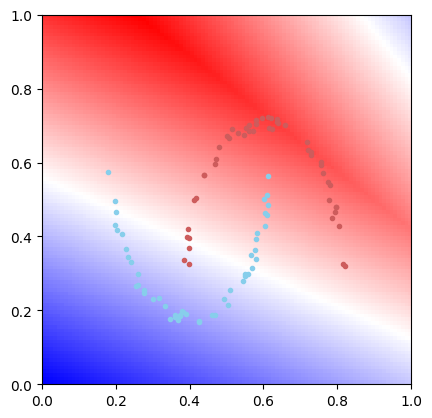

In [6]:
# this will run the training for two seconds, and show update every one second.
# feel free to adjust
losslist.extend(trainloop(seconds=2, secbetweenimage=1, show=True))

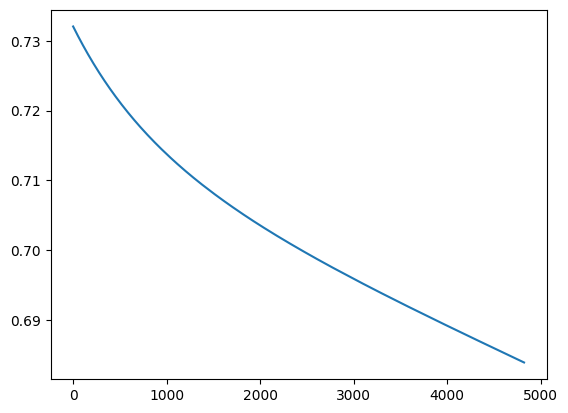

In [7]:
plt.plot(losslist)

## Visualizing a single neuron's output

Visualizing output of neuron n°3 out of 5 neurons


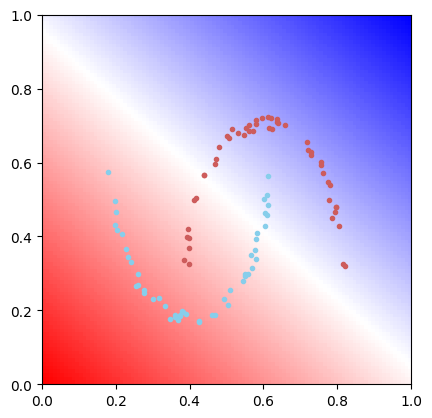

In [8]:
num_neuron = 3
print(f"Visualizing output of neuron n°{num_neuron} out of {model[0].weight.shape[0]} neurons")

import copy
mod = copy.deepcopy(model)
with torch.no_grad():
    num_neuron -= 1
    mod[0].weight[num_neuron+1:] = 0
    mod[0].bias[num_neuron+1:] = 0
    mod[0].weight[:num_neuron] = 0
    mod[0].bias[:num_neuron] = 0

showoutput(mod, X, Y, once=True, discretize=False)


## Task 1: Tune the network

- change the optimiser (currently : vanilla gradient descent)
- tune the learning rate (currently : too low)
- change the loss function
- add more neurons !
- change the activation function
- add more layers ?
- (bit more complex) add a learning rate scheduler

## Task 2: Change the dataset

- increase or decrease the number of samples ($n=100$ by default)
- make the data more or less linear ($closeness=0.7$ be default)
- Try a random dataset

# MNIST

In [9]:
import torch
import torchvision
## Create dataloader, in PyTorch, we feed the trainer data with use of dataloader
## We create dataloader with dataset from torchvision, 
## and we dont have to download it seperately, all automatically done

# Define batch size, batch size is how much data you feed for training in one iteration
batch_size_train = 32 # We use a small batch size here for training
batch_size_test = 32 #

# define how image transformed
image_transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])
#image datasets
train_dataset = torchvision.datasets.MNIST('dataset/', 
                                           train=True, 
                                           download=True,
                                           transform=image_transform)
test_dataset = torchvision.datasets.MNIST('dataset/', 
                                          train=False, 
                                          download=True,
                                          transform=image_transform)
#data loaders
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size_train, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size_test, 
                                          shuffle=True)

Label: tensor(2)


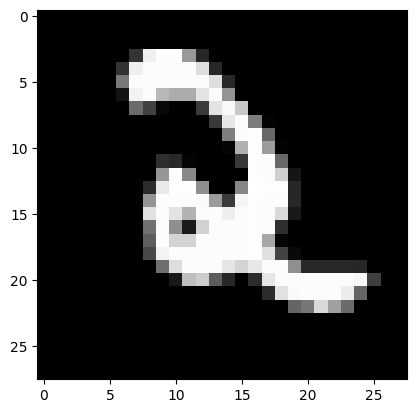

In [10]:
# import library
import matplotlib.pyplot as plt
# We can check the dataloader
_, (example_datas, labels) = next(enumerate(test_loader))
sample = example_datas[0][0]
# show the data
plt.imshow(sample, cmap='gray', interpolation='none')
print("Label: "+ str(labels[0]))

In [11]:
## Now we can start to build our CNN model
## We first import the pytorch nn module and optimizer
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
## Then define the model class
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #input channel 1, output channel 10
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5, stride=1)
        #input channel 10, output channel 20
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1)
        #dropout layer
        self.conv2_drop = nn.Dropout2d()
        #fully connected layer
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.conv2_drop(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = x.view(-1, 320)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, 1)


In [12]:
## create model and optimizer
learning_rate = 0.01
momentum = 0.5
device = "cpu"
model = CNN().to(device) #using cpu here
optimizer = optim.SGD(model.parameters(), lr=learning_rate,
                      momentum=momentum)

## Output random sample, and test model

Of course it gives a completely random guess, we haven't trained it yet!

Label: tensor(8)
0 : 10.87486%
1 : 9.97713%
2 : 10.32168%
3 : 11.16323%
4 : 9.92235%
5 : 7.81469%
6 : 7.45816%
7 : 8.85170%
8 : 7.36921%
9 : 16.24699%


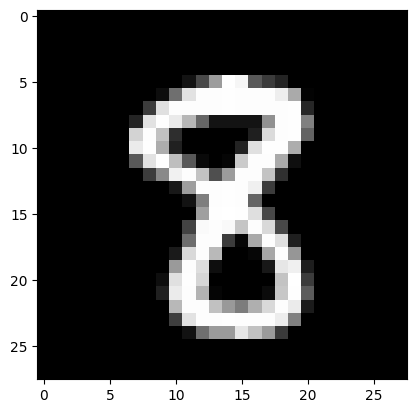

In [13]:
# import library
import matplotlib.pyplot as plt
# We can check the dataloader
_, (example_datas, labels) = next(enumerate(test_loader))
sample = example_datas[0][0]
# show the data
plt.imshow(sample, cmap='gray', interpolation='none')
print("Label: "+ str(labels[0]))
with torch.no_grad():
    out = model(example_datas)[0].numpy()
for i, p in enumerate(out):
    print(f"{i} : {np.exp(p)*100:.5f}%")

In [14]:
# evaulate the model
test(model, device, test_loader)
# before training, we expect 1/10 % accuracy, i.e. random guesses.


Test set: Average loss: 2.3180, Accuracy: 1113/10000 (11%)



## Train the model on the whole dataset, minibatch by minibatch

In [15]:
train(model, device, train_loader, optimizer)
print("testing...")
test(model, device, test_loader)


  0%|          | 0/1875 [00:00<?, ?it/s]

testing...

Test set: Average loss: 0.2635, Accuracy: 9277/10000 (93%)



## Evaluating the model on a single example

Label: tensor(8)
P(class=0) : 1.889%
P(class=1) : 6.514%
P(class=2) : 11.527%
P(class=3) : 7.521%
P(class=4) : 0.414%
P(class=5) : 2.180%
P(class=6) : 0.595%
P(class=7) : 10.078%
P(class=8) : 49.808%
P(class=9) : 9.474%


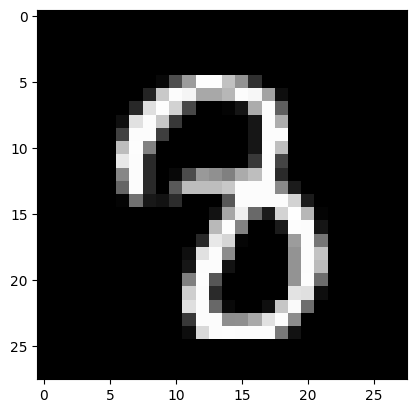

In [16]:
# import library
import matplotlib.pyplot as plt
# We can check the dataloader
_, (example_datas, labels) = next(enumerate(test_loader))
sample = example_datas[0][0]
# show the data
plt.imshow(sample, cmap='gray', interpolation='none')
print("Label: "+ str(labels[0]))
with torch.no_grad():
    out = model(example_datas)[0].numpy()
for i, p in enumerate(out):
    print(f"P(class={i}) : {np.exp(p)*100:.3f}%")

## Task 3: Reduce the training time by reducing the network's size, layers.

How much accuracy can you keep?

- use different optimiser, learning rates
- change batchsize
- add regularizer?
- change activation functions
- convolution filter sizes

# Links

- first part inspired by the [numerical tour](https://www.numerical-tours.com/python/)